**SENTIMENT ANALYSIS ON CUSTOMER REVIEWS USING NLP FOR AMAZON MUSIC REVIEW**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

**DOWNLOAD THE DATASET**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("eswarchandt/amazon-music-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\eswarchandt\amazon-music-reviews\versions\2


**READ THE DATASET**

In [3]:
data = pd.read_csv("C:\\Users\\HP\\.cache\\kagglehub\\datasets\\eswarchandt\\amazon-music-reviews\\versions\\2\\Musical_instruments_reviews.csv")

In [4]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
data.shape

(10261, 9)

**DATA PREPROCESSING**

In [6]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [7]:
#fill the missing values
data['reviewText'].fillna(value=" ",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_60752\3056705610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviewText'].fillna(value=" ",inplace=True)


In [8]:
#concate reviewtext and summary columns
data['reviews'] = data['reviewText']+ " " + data['summary']

#drop columns reviewtext and summary
data.drop(columns = ['reviewText','summary'],axis = 1,inplace =  True)

In [9]:
data['reviews']

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
                               ...                        
10256    Great, just as expected.  Thank to all. Five S...
10257    I've been thinking about trying the Nanoweb st...
10258    I have tried coated strings in the past ( incl...
10259    Well, MADE by Elixir and DEVELOPED with Taylor...
10260    These strings are really quite good, but I wou...
Name: reviews, Length: 10261, dtype: object

In [10]:
data.describe(include="all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10261
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6796,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN


**EXPLORATORY DATA ANALYSIS (EDA)**

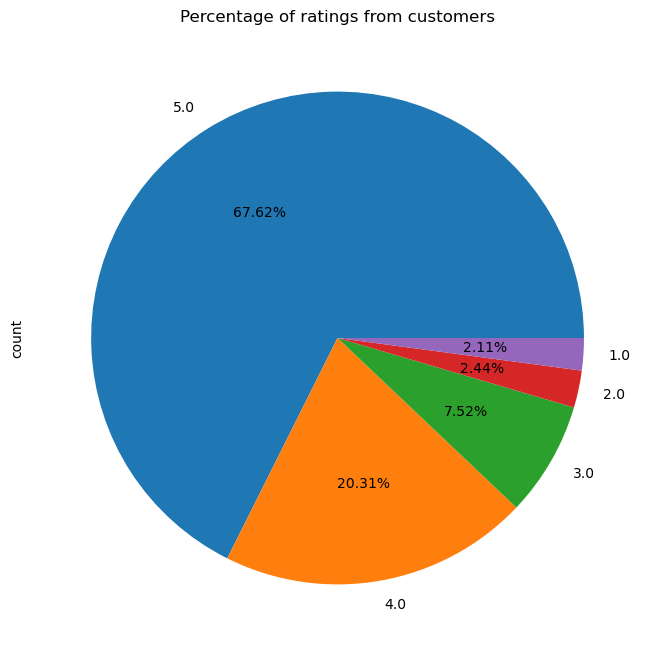

In [11]:
data.overall.value_counts().plot(
    kind = "pie",
    legend=False,
    autopct="%1.2f%%",
    fontsize = 10,
    figsize = (8,8)
)
plt.title("Percentage of ratings from customers")
plt.show()

***CRAETE A FUNCTION FOR GROUPING PRODUCTS BASED ON RATINGS***

In [12]:
def grouping(Rows):
    if(Rows["overall"] >3.0):
        group="Positive"
    elif(Rows["overall"] <3.0):
        group="Negative"
    else:
        group="Neutral"
    return group

In [13]:
data["sentiment"] = data.apply(grouping,axis= 1)

In [14]:
data.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


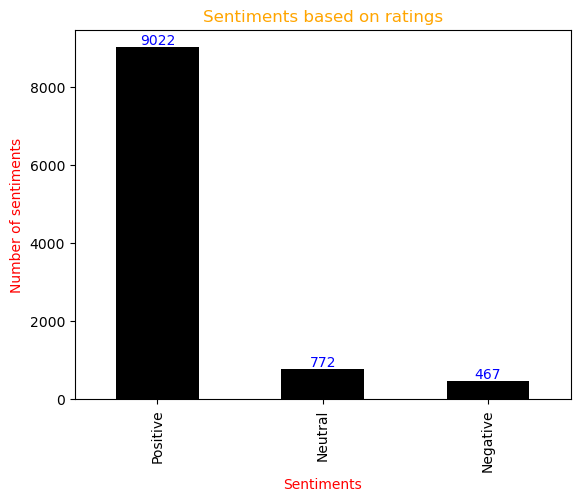

In [15]:
ax=data["sentiment"].value_counts().plot(kind="bar",color="black")

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),  # The value to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='bottom', fontsize=10, color='blue'  # Text properties
    )
    
plt.title("Sentiments based on ratings",color="orange")
plt.xlabel("Sentiments",color="red")
plt.ylabel("Number of sentiments",color="red")
plt.show()

**TEXT PROCESSING**

***NLP Text Libraries***

In [16]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


***Text cleaning***

In [17]:
def text_cleaning(text):
    #changing the text to lowercase
    text=text.lower()

    #cleaning punctuations in text
    punc=str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text=text.translate(punc)

    #removing numbers in text
    text=re.sub(r'\d+', '',text)
    
    #remove links
    text=re.sub(r'https?://\S+|www\.\S+', '', text)

    #deleting new lines
    text=re.sub(r'\n','',text)

    return text   

**Text Preprocessing**

In [18]:
#Stopwords
Stopwords=set(nltk.corpus.stopwords.words("english"))-set(["not"])

def text_processing(text):
    processed_text = list()
    Lemmatizer = WordNetLemmatizer()

    #tokens of words
    Tokens=nltk.word_tokenize(text)

    for word in Tokens:
        if word not in Stopwords:
            processed_text.append(Lemmatizer.lemmatize(word))
    return(" ".join(processed_text))

In [19]:
data["reviews"]= data["reviews"].apply(lambda text: text_cleaning(text))
data["reviews"]= data["reviews"].apply(lambda text: text_processing(text))

**Exploratory Data Analysis(EDA) Analysis**

In [20]:
data.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive


**POLARITY**

Polarity is a term often used in the context of sentiment analysis and natural language processing (NLP) to describe the sentiment of a piece of text. It refers to the degree to which the sentiment expressed in the text is positive, negative, or neutral

In [21]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
data["polarity"]=data["reviews"].map(lambda text: TextBlob(text).sentiment.polarity)

Text(0, 0.5, 'Number of reviews')

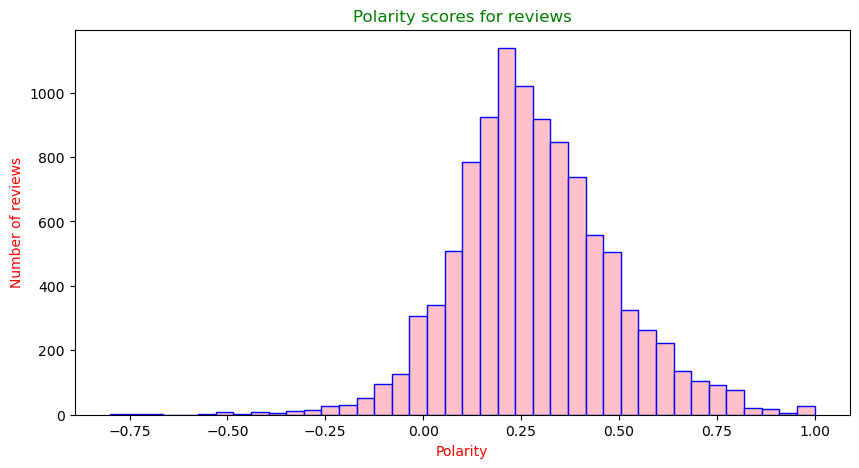

In [23]:
data["polarity"].plot(kind="hist",bins=40,edgecolor="blue",color="pink",figsize=(10,5))
plt.title("Polarity scores for reviews",color="green")
plt.xlabel("Polarity",color="red")
plt.ylabel("Number of reviews",color="red")

**REVIEW LENGTH**

The review length refers to the number of characters, words, or sentences in a review. Measuring the length of a review can provide insights into customer engagement, sentiment, or the amount of detail provided in feedback.

In [24]:
data["length"]=data["reviews"].astype(str).apply(len)

Text(0, 0.5, 'Number of reviews')

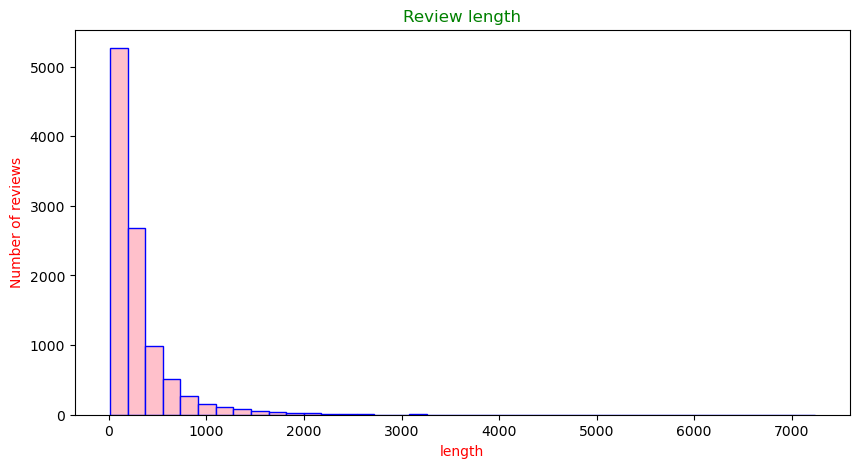

In [25]:
data["length"].plot(kind="hist",bins=40, edgecolor="blue", color="pink", figsize=(10,5))
plt.title("Review length", color="green")
plt.xlabel("length", color="red")
plt.ylabel("Number of reviews", color="red")

**WORD COUNT**

To calculate the word count of a review or any text, you can split the text into words using spaces or other delimiters and count the resulting words.

In [26]:
data["word_count"]=data["reviews"].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of reviews')

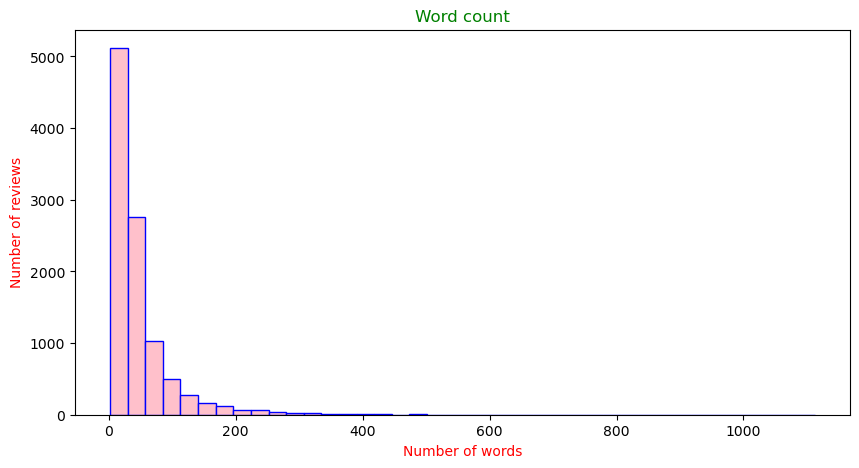

In [27]:
data["word_count"].plot(kind="hist",bins=40, edgecolor="blue", color="pink", figsize=(10,5))
plt.title("Word count", color="green")
plt.xlabel("Number of words", color="red")
plt.ylabel("Number of reviews", color="red")

**N-GRAM ANALYSIS**

**N-Gram Function**

In [28]:
def Gram_Analysis(Corpus, Gram, N):
    #vectorizer
    Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

    #N-Grams Matrix
    ngrams = Vectorizer.fit_transform(Corpus)

    #N-GramFrequency
    Count = ngrams.sum(axis = 0)

    #list of words
    words= [(word,Count[0,idx]) for word, idx in Vectorizer.vocabulary_.items()]

    #sort Descending with key= Count
    words = sorted(words, key = lambda x:x[1], reverse = True)

    return words[:N]

In [29]:
Positive = data[data["sentiment"] == "Positive"].dropna() 
Neutral = data[data["sentiment"] == "Neutral"].dropna() 
Negative = data[data["sentiment"] == "Negative"].dropna() 

**Unigram of Reviews Based on Sentiments**

Text(0, 0.5, 'Number of reviews')

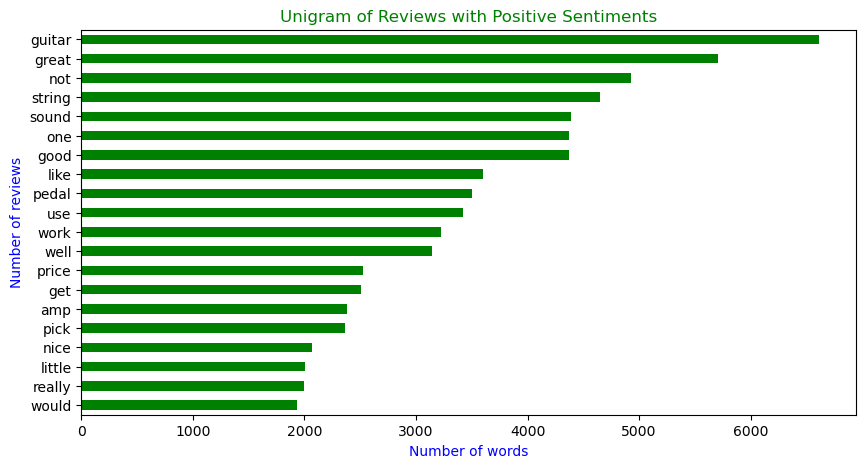

In [30]:
# Assuming 'Stopwords' is a list of stop words that you want to use.
Stopwords = [...]

#Finding Unigram
words= Gram_Analysis(Positive["reviews"],1,20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="green",figsize = (10,5))
plt.title("Unigram of Reviews with Positive Sentiments", color="green")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

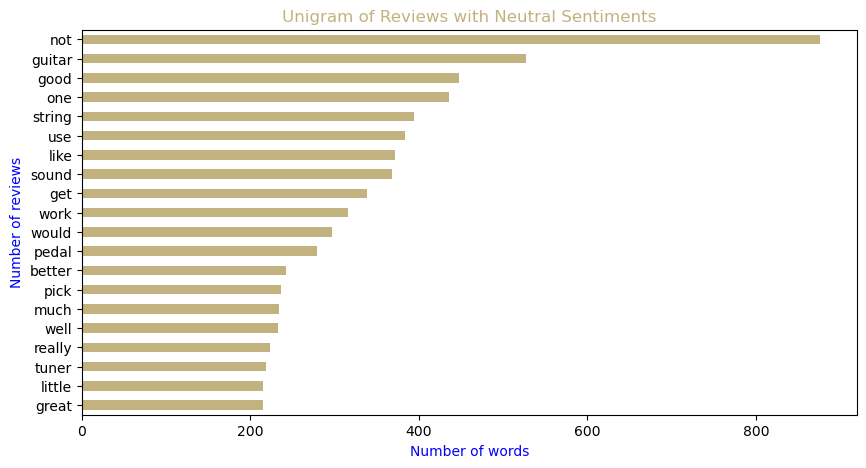

In [31]:
#Finding Unigram
words= Gram_Analysis(Neutral["reviews"],1,20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="#C2B280",figsize = (10,5))
plt.title("Unigram of Reviews with Neutral Sentiments", color="#C2B280")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

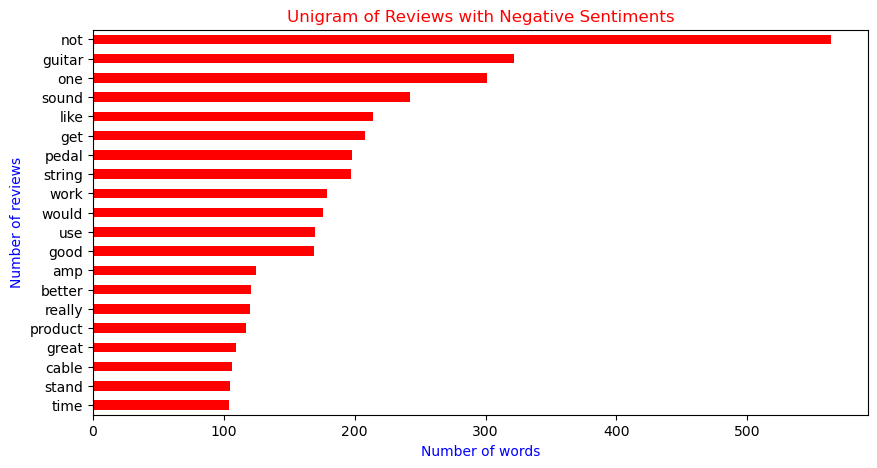

In [32]:
#Finding Unigram
words= Gram_Analysis(Negative["reviews"],1,20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="Red",figsize = (10,5))
plt.title("Unigram of Reviews with Negative Sentiments", color="Red")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

**Bigram of Reviews Based On Sentiments**

Text(0, 0.5, 'Number of reviews')

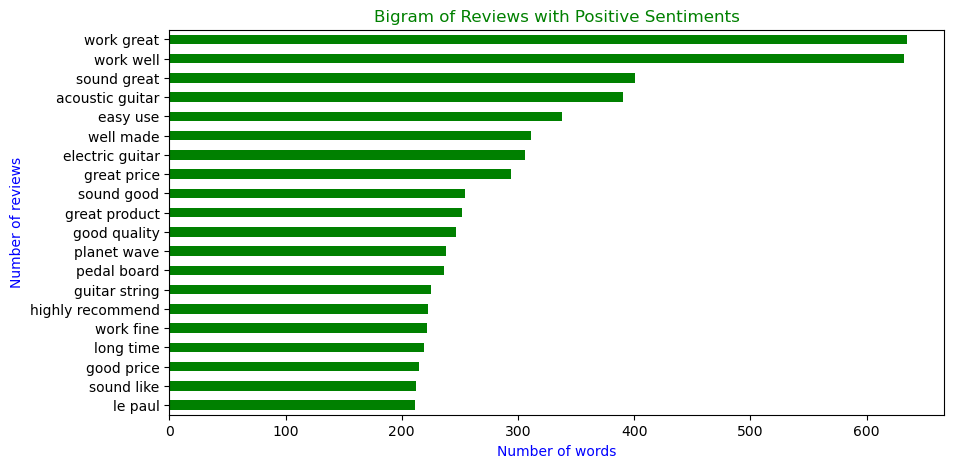

In [33]:
#Finding Bigram
words= Gram_Analysis(Positive["reviews"],2,20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="green",figsize = (10,5))
plt.title("Bigram of Reviews with Positive Sentiments", color="green")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

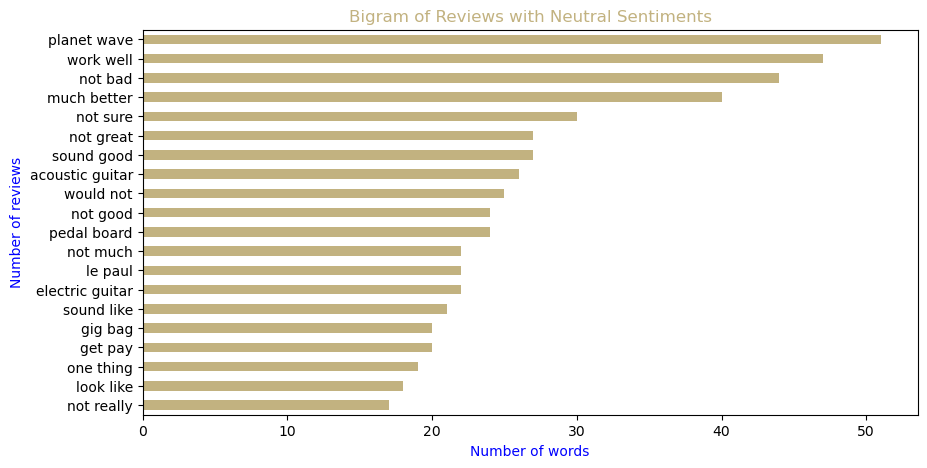

In [34]:
#Finding Bigram
words= Gram_Analysis(Neutral["reviews"],2,20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="#C2B280",figsize = (10,5))
plt.title("Bigram of Reviews with Neutral Sentiments", color="#C2B280")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

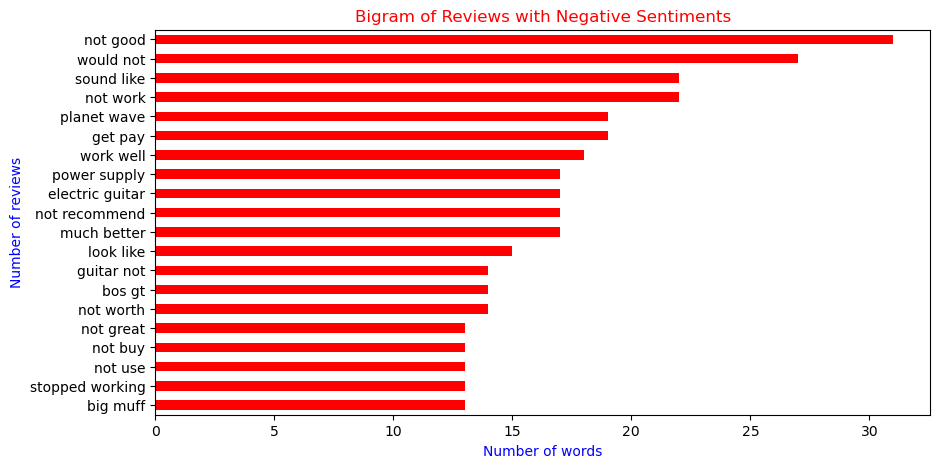

In [35]:
#Finding Bigram
words= Gram_Analysis(Negative["reviews"],2,20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="Red",figsize = (10,5))
plt.title("Bigram of Reviews with Negative Sentiments", color="Red")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

**Trigram of Reviews Based on Sentiments**

Text(0, 0.5, 'Number of reviews')

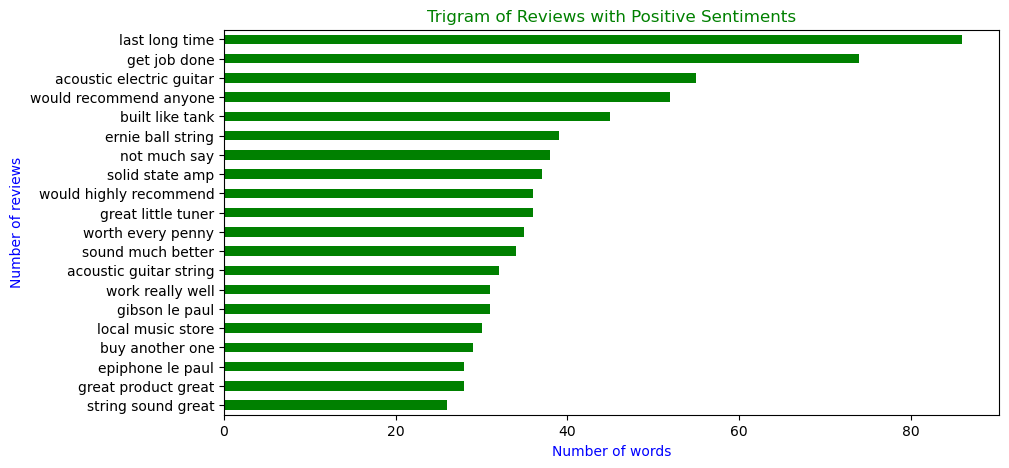

In [36]:
#Finding Trigram
words= Gram_Analysis(Positive["reviews"],3,20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="green",figsize = (10,5))
plt.title("Trigram of Reviews with Positive Sentiments", color="green")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

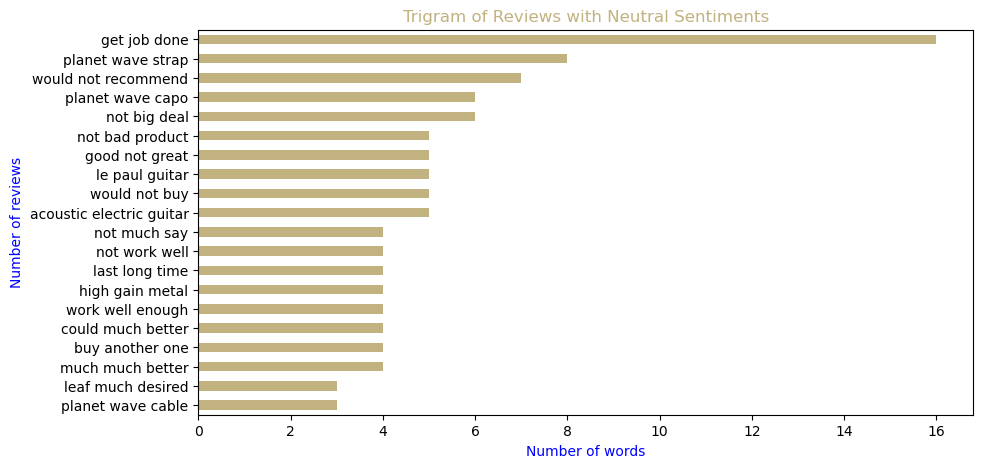

In [37]:
#Finding Trigram
words= Gram_Analysis(Neutral["reviews"],3,20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="#C2B280",figsize = (10,5))
plt.title("Trigram of Reviews with Neutral Sentiments", color="#C2B280")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

Text(0, 0.5, 'Number of reviews')

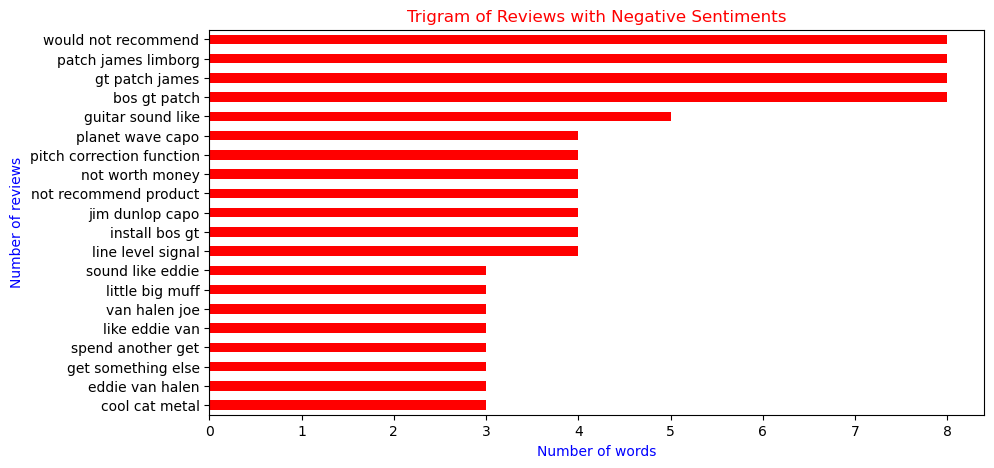

In [38]:
#Finding Trigram
words= Gram_Analysis(Negative["reviews"],3,20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

#Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh",color="Red",figsize = (10,5))
plt.title("Trigram of Reviews with Negative Sentiments", color="Red")
plt.xlabel("Number of words", color="blue")
plt.ylabel("Number of reviews", color="blue")

**WORD CLOUDS**

In [39]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
Stopwords= STOPWORDS

**Word Cloud of Reviews with Positive Sentiments**

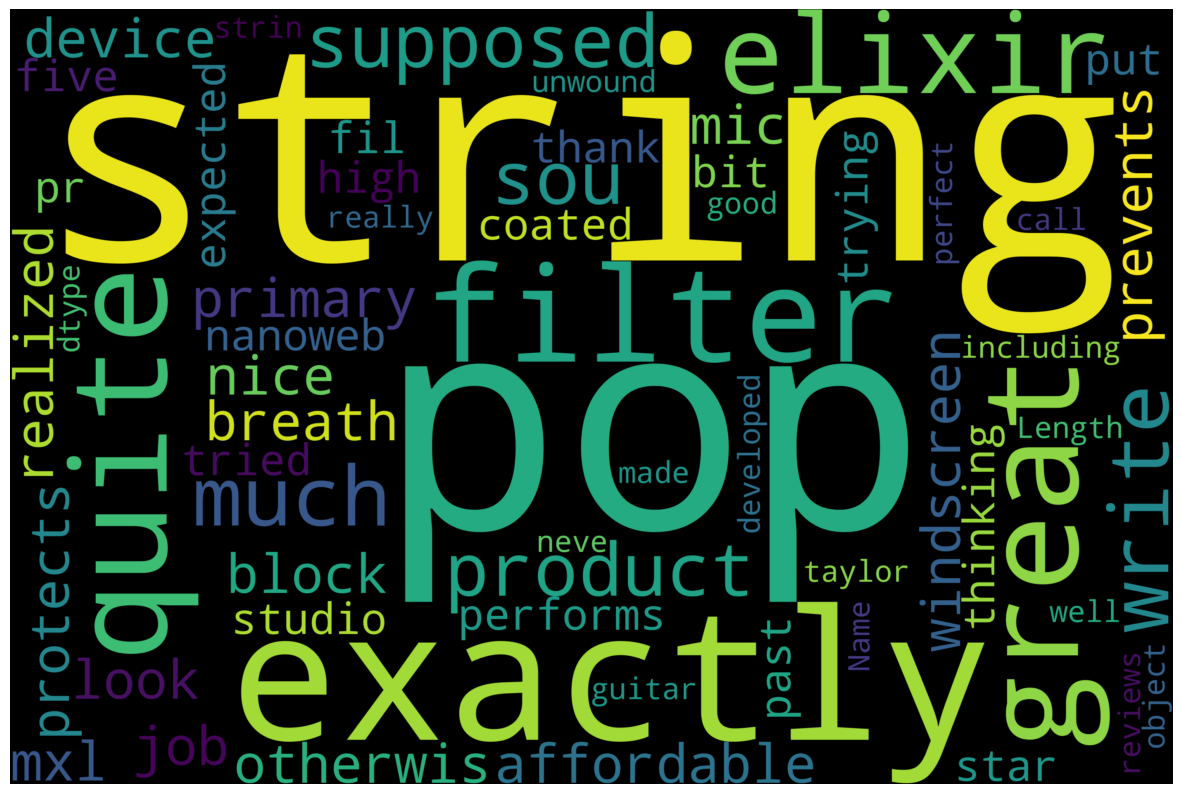

In [40]:
#Generate  WordCloud for positive sentiment reviews
wordCloud = WordCloud(max_words= 70, width = 3000, height = 2000, stopwords = Stopwords).generate(str(Positive["reviews"].dropna()))

#visualization
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()                                 

**Word Cloud of Reviews with Neutral Sentiments**

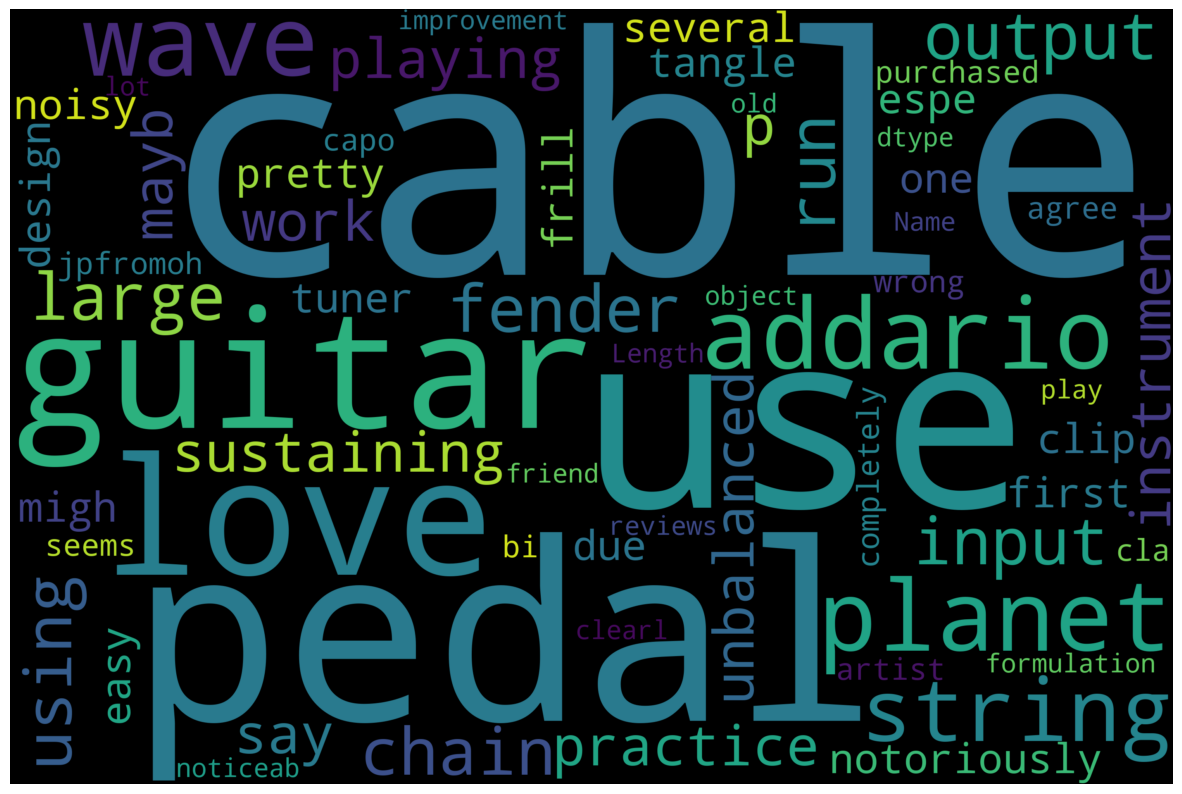

In [41]:
#Generate  WordCloud for Neutral sentiment reviews
wordCloud = WordCloud(max_words= 70, width = 3000, height = 2000, stopwords = Stopwords).generate(str(Neutral["reviews"].dropna()))

#visualization
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()    

**Word Cloud of Reviews with Negative Sentiments**

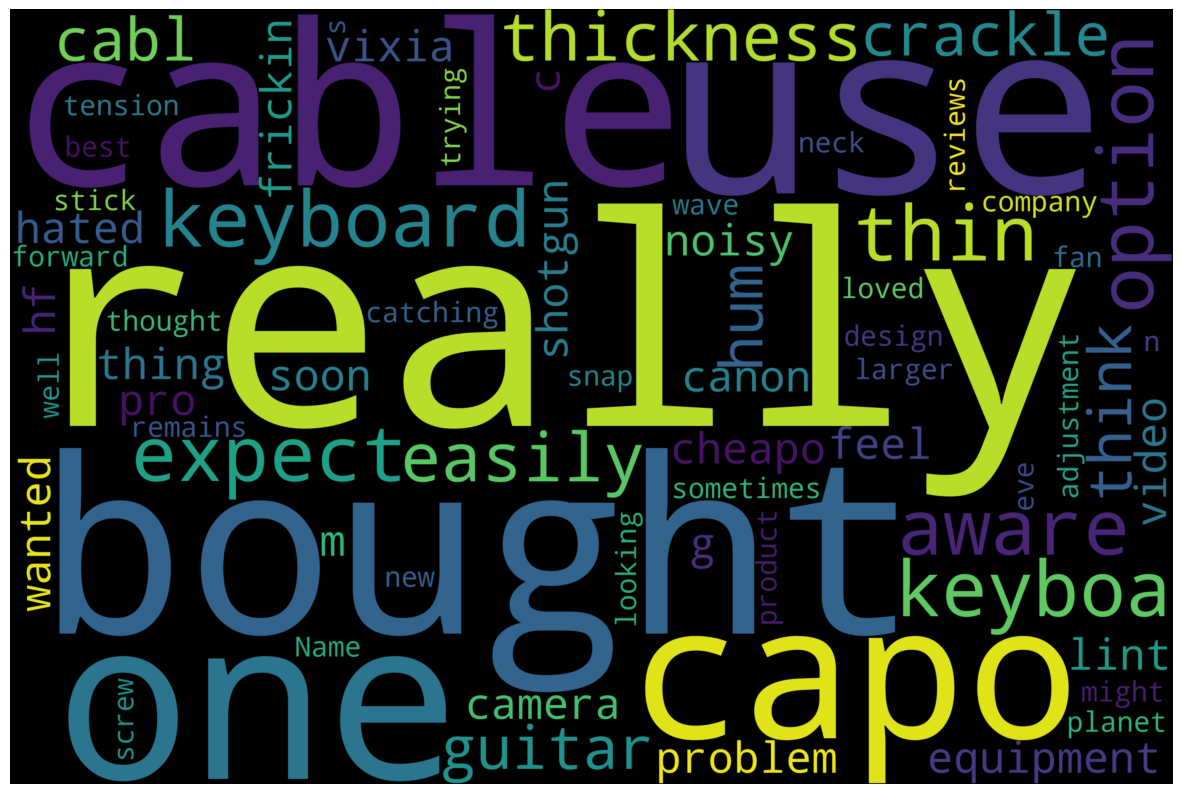

In [42]:
#Generate  WordCloud for Negative sentiment reviews
wordCloud = WordCloud(max_words= 70, width = 3000, height = 2000, stopwords = Stopwords).generate(str(Negative["reviews"].dropna()))

#visualization
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()    

**FEATURE ENGINEERING**

In [43]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [44]:
data.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment,polarity,length,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive,0.3500,154,25
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive,0.0000,337,54
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296,45
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169,23
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114,18


In [45]:
columns=["reviewerID","asin","reviewerName","helpful","overall","unixReviewTime","reviewTime","polarity","length","word_count"]
data.drop(columns , axis = 1,inplace =True)

In [46]:
data.head(10)

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive
5,good bought another one love heavy cord gold c...,Positive
6,used monster cable year good reason lifetime w...,Positive
7,use cable run output pedal chain input fender ...,Neutral
8,perfect epiphone sheraton ii monster cable wel...,Positive
9,monster make best cable lifetime warranty does...,Positive


**ENCODING THE SENTIMENT**

In [47]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder


Encoder = LabelEncoder()
data["sentiment"]=Encoder.fit_transform(data["sentiment"])
data["sentiment"].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

From above, we know that the label Positive is encoded into 2, Neutral into 1, and Negative into 0. 

**TF-IDF VECTORIZER**

In [48]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(data["reviews"])
X.shape                       

(10261, 5000)

In [49]:
y= data["sentiment"]

**RESAMPLING OUR DATASET**

In [50]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [51]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [52]:
Balancer = SMOTE(random_state = 42)
X_final,y_final = Balancer.fit_resample(X,y)

In [53]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

**SPLITTING OUR DATASET**

In [54]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.25,random_state=42)

In [55]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20299, 5000)
X_test shape: (6767, 5000)
y_train shape: (20299,)
y_test shape: (6767,)


**MODEL SELECTION AND EVALUATION**

In [56]:
# Model Building
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

***Model Building***

In [57]:
DT = DecisionTreeClassifier()
LR = LogisticRegression()
SVC_Model=SVC()
RF=RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DT,LR,SVC_Model,RF,Bayes,KNN]
Model_Dict = {0:"DecisionTree",1:"LogisticRegression",2:"SVC",3:"RandomForest",4:"Bernoulli",5:"KNeighbors"}

for i,model in enumerate(Models):
    print("{} Test Accuracy: {}".format(Model_Dict[i],cross_val_score(model, X,y,cv = 10, scoring = "accuracy").mean()))

DecisionTree Test Accuracy: 0.8239931213948536
LogisticRegression Test Accuracy: 0.8819802942387887
SVC Test Accuracy: 0.8805184008381876
RandomForest Test Accuracy: 0.8774973379570316
Bernoulli Test Accuracy: 0.8099589827104816
KNeighbors Test Accuracy: 0.8476764777897356


**HYPERPARAMETER TUNING**

In [58]:
Param = {"C":np.logspace(-4,4,50),"penalty":['l1','l2']}
grid_search = GridSearchCV(
    estimator = LogisticRegression(random_state = 42,solver='liblinear'),
    param_grid=Param,scoring = "accuracy",cv=10,verbose = 0, n_jobs = -1)

grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy:{:.2f}%".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

Best Accuracy:92.45%
Best Parameters: {'C': 24.420530945486497, 'penalty': 'l2'}


**BEST MODEL**

In [59]:
Classifier = LogisticRegression(random_state = 42,C=6866.488450042998,penalty = 'l2')
Classifier.fit(X_train,y_train)

Prediction = Classifier.predict(X_test)

**ACCURACY ON TEST DATA**

In [60]:
accuracy_score(y_test,Prediction)

0.9527116890793557

**CONFUSION MATRIX**

In [61]:
ConfusionMatrix = confusion_matrix(y_test,Prediction)

In [62]:
# Function for confusion matrix

def plot_cm(cm,classes,title,normalized = False,cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = "nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalized:
        cm=cm.astype('float')/cm.sum(axis= 1)[:np.newaxis]
        print("Normalized Confusion marix")
    else:
        print("Normalized Confusion marix")

    threshold =cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j,i, cm[i, j],horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")
            
    plt.tight_layout()
    plt.xlabel("Predicted Label")
    plt.ylabel("Real Label")    

Normalized Confusion marix


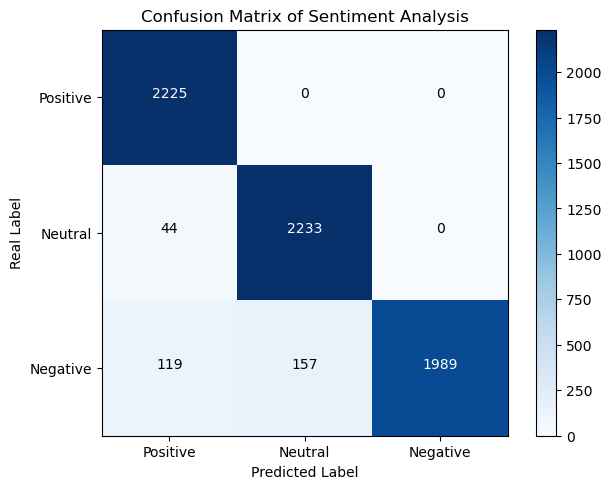

In [63]:
#confusion matrix
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

**CLASSIFICATION REPORT**

In [64]:
print(classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2225
           1       0.93      0.98      0.96      2277
           2       1.00      0.88      0.94      2265

    accuracy                           0.95      6767
   macro avg       0.96      0.95      0.95      6767
weighted avg       0.96      0.95      0.95      6767

